PASTE README HERE

---

### Project 1 - Buenos Aires House Pricing Prediction 
### Part 1: EDA

---

Notebook content:

1. Exploratory Data Analysis
2. Data filtering
3. PCA 
4. Geographic information analysis

### 1. Exploratory Data Analysis
---



Import libraries.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

sns.set() 

In [2]:
warnings.simplefilter('ignore')

Import dataset.

In [3]:
df = pd.read_csv('datasets/DS_Proyecto_01_Datos_Properati.csv')

In [4]:
ds = df.copy()

Dataset Inspection.

In [5]:
type(ds)

pandas.core.frame.DataFrame

In [5]:
print('Number of rows: {}'.format(ds.shape[0]))
print('Number of columns: {}'.format(ds.shape[1]))

Number of rows: 146660
Number of columns: 19


Check first instances of the dataset.

In [6]:
ds.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Check features information.

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

The dataset has 11 categorical features and 8 numerical features. There are 5 columns with missing data, been 'surface_total' and 'surface_covered' the ones more affected by this.

Features 'l1', 'l2' and 'l3' correspond to 'country', 'region' and 'neighbourhood' respectively, so we'll change that columns names for clarity.

In [6]:
ds.rename(columns={'l1':'country', 'l2':'region','l3': 'neighbourhood'}, inplace=True)

Change categories names in 'property_type'.

In [7]:
ds['property_type']= ds['property_type'].map({'Departamento':'apartment', 'Casa':'house','PH':'condominium','Lote':'lot',
                                              'Oficina':'office','Otro':'other','Local comercial':'commercial lot','Casa de campo':'country house',
                                              'Depósito':'warehouse','Cochera':'parking space'})

Chek number of categories in 'region' and 'neighbourhood' given that this will be important for the development of our models.

In [7]:
print('Number of categories in \'region\': {}'.format(ds['region'].nunique()))
print('Number of categories in \'neighbourhood\': {}'.format(ds['neighbourhood'].nunique()))

Number of categories in 'region': 4
Number of categories in 'neighbourhood': 89


Check regions and number of publications for each.

In [8]:
ds['region'].value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: region, dtype: int64

Check neighborhoods and number of instances for each.

In [9]:
ds['neighbourhood'].value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: neighbourhood, Length: 89, dtype: int64

Check missing values.

In [91]:
ds.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
country                0
region                 0
neighbourhood          0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [9]:
print('Total missing values: {}'.format(ds.isnull().sum().sum()))

Total missing values: 67982


Check duplicated values. 

In [10]:
ds.duplicated().sum()

2358

<font color='grey'>dropna() Option1</font> 

In [95]:
# ds.dropna(inplace=True)

'property_types' feature inspection.

In [14]:
print('Number of categories in \'property_types\': {}'.format(ds['property_type'].nunique()))

Number of categories in 'property_types': 10


In [66]:
print('Categories and number of instances in each:\n', ds["property_type"].value_counts(), sep='')

Categories and number of instances in each:
apartment         107326
house              21521
condominium        14298
lot                 1312
office               658
other                374
commercial lot       325
country house        322
warehouse            265
parking space        259
Name: property_type, dtype: int64


In [115]:
print('Categories and number of instances in each:\n', ds["property_type"].value_counts(), sep='')

Categories and number of instances in each:
apartment         85071
house             15162
condominium       13530
office              336
country house       240
other                98
lot                  29
commercial lot       15
warehouse             5
parking space         2
Name: property_type, dtype: int64


Histogram of this information.

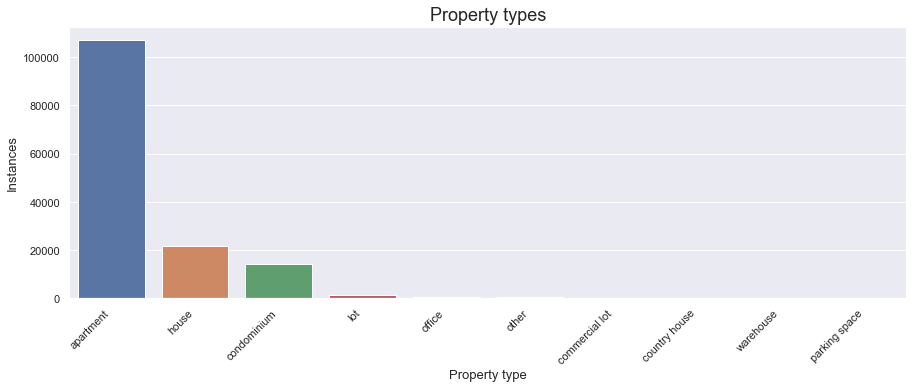

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x='property_type', data=ds, order=ds['property_type'].value_counts().index)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Property type', fontsize=13)
plt.ylabel('Instances', fontsize=13)
plt.title('Property types', fontsize=18)
plt.show()

**Figure 1.** Number of instances for each property type.

Most instances correspond to 'apartment', 'house' and 'condominium'. The dataset is inbalanced wrt the property type.

'Regions' and 'Neighborhoods' inspection.

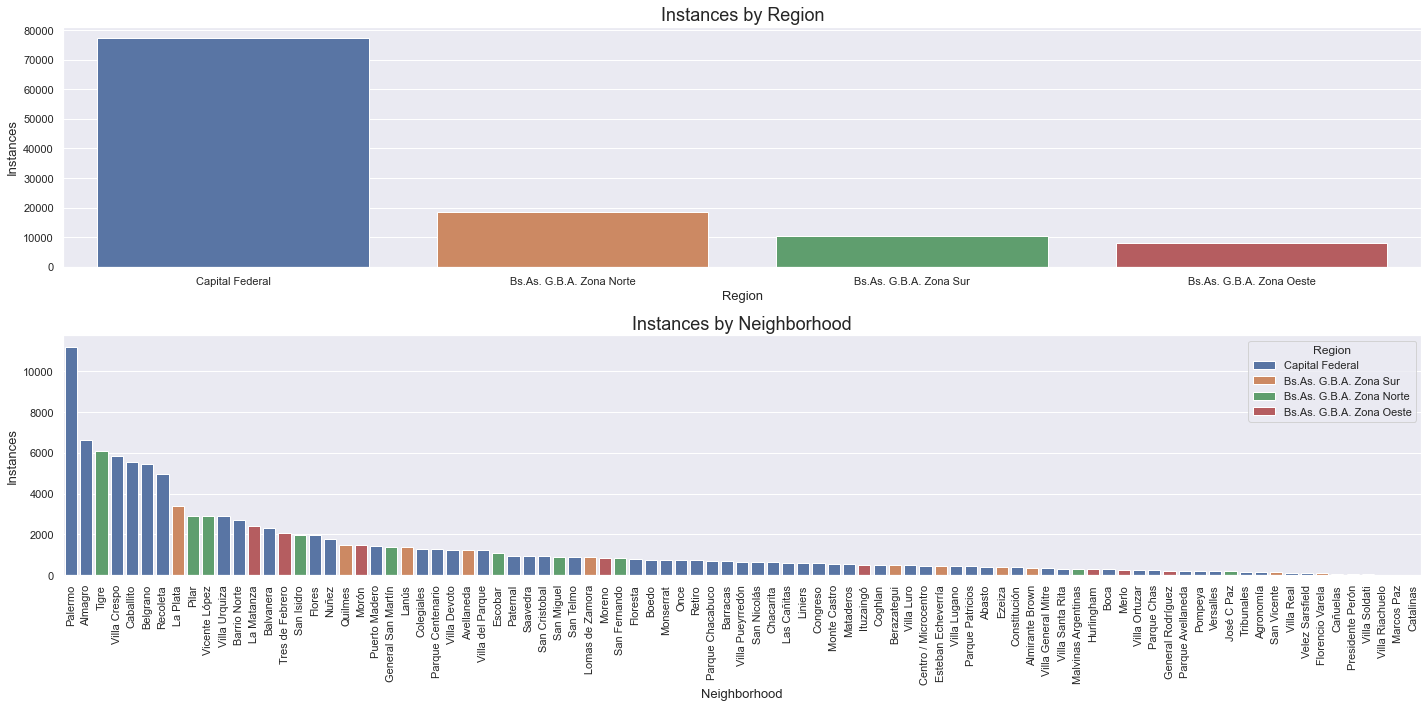

In [122]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.countplot(x= 'region', data=ds, label='Localidad', order=ds['region'].value_counts().index)
plt.xticks(fontweight='light') # horizontalalignment='right'
plt.title('Instances by Region', fontsize=18)
plt.xlabel('Region', fontsize=13)
plt.ylabel('Instances', fontsize=13)

plt.subplot(2,1,2)
sns.countplot(x= 'neighbourhood', data=ds, hue='region', dodge=False, order=ds['neighbourhood'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Instances by Neighborhood', fontsize=18)
plt.xlabel('Neighborhood', fontsize=13)
plt.ylabel('Instances', fontsize=13)

plt.legend(title='Region', loc='upper right')

plt.tight_layout()                   

**Figura 2.** Number of instances by Region and Neighborhood.

More than 60% of the instances are in 'Capital Federal'. 'Palermo' and 'Tigre', placed in 'Capital Federal' and 'Bs.As GBA Zona Norte' regions respectively, are the neighborhoods with more instances.

### 2. Dataset filtering
---

#### 2.1 Instances subsample selection.

We are selecting only the  properties in 'Capital Federal' region and the 3 most prevailing property types in the dataset.


Filtering info function.

In [13]:
def ds_info(ds1,ds2):
    print('Deleted rows: {}'.format(ds1.shape[0]-ds2.shape[0]))
    print('Number of rows: {}'.format(ds2.shape[0]))
    print('Number of columns: {}'.format(ds2.shape[1]))    

Select 3 most common property types.

In [14]:
prop_type_most = ds["property_type"].value_counts()
prop_type_selection = prop_type_most[:3]

print('Property types more present in the dataset: \n', prop_type_selection, sep='')

Property types more present in the dataset: 
apartment      107326
house           21521
condominium     14298
Name: property_type, dtype: int64


Select most common region.

In [15]:
region_selection = ds['region'].max()

print('Region more present in dataset: {}'.format(region_selection))

Region more present in dataset: Capital Federal


Deleting duplicates rows. 

In [16]:
ds_1 = ds.drop_duplicates()
ds_info(ds, ds_1)

Deleted rows: 2358
Number of rows: 144302
Number of columns: 19


Filtering dataset making a dataset with the 3 most predominant property types in 'Capital Federal' Region. 

In [17]:
ds_2 = ds_1[(ds['region'] == region_selection) & (ds_1['property_type'].isin(prop_type_selection.index))]
ds_info(ds_1, ds_2)

Deleted rows: 54428
Number of rows: 89874
Number of columns: 19


#### 2.2 Outliers and errors filtering.

Filtering instances in which 'surface_covered' is bigger than 'surface_total'. 

In [18]:
ds_3 = ds_2[(ds_2['surface_total'] >= ds_2['surface_covered'])]
ds_info(ds_2, ds_3)

Deleted rows: 9980
Number of rows: 79894
Number of columns: 19


Selecting properties which total_surface is lower than 1000 m$^2$ and higher than 15 m$^2$. 

In [19]:
ds_4 = ds_3[(ds_3['surface_total'] <= 1000) & (ds_3['surface_total'] >= 15)]

ds_info(ds_3, ds_4)

Deleted rows: 150
Number of rows: 79744
Number of columns: 19


First Feature selection.

In [20]:
ds_5 = ds_4[['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'property_type', 'lat', 'lon', 'price']] # -> with lat and lon
ds_info(ds_4, ds_5)

Deleted rows: 0
Number of rows: 79744
Number of columns: 9


Imputation of null values in discrete feature 'bathrooms'.

In [21]:
data_replace = dict(ds_5.groupby('property_type')['bathrooms'].agg(pd.Series.mode))
data_replace

{'apartment': 1.0, 'condominium': 1.0, 'house': 2.0}

In [22]:
ds_5['bathrooms'] = ds_5['bathrooms'].fillna(ds_5.property_type.map(data_replace))
print(f'Number of rows: {ds_5.shape[0]}\n' f'Number of columns: {ds_5.shape[1]}')

Number of rows: 79744
Number of columns: 9


Delete rows with null values. 

In [23]:
ds_6 = ds_5.dropna()
ds_info(ds_5, ds_6)

Deleted rows: 4121
Number of rows: 75623
Number of columns: 9


Delete error data (prices above U$S 10M) 

In [24]:
ds_7 = ds_6[ds_6['price']<10000000]
ds_info(ds_6, ds_7)

Deleted rows: 1
Number of rows: 75622
Number of columns: 9


### Outliers 

In [66]:
ds_7.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,lat,lon,price
count,75580.000000,75580.000000,75580.000000,75580.000000,75580.000000,75580.000000,75580.000000,7.558000e+04
mean,2.999788,1.995197,1.530445,94.514647,81.234917,-34.598362,-58.434899,2.548415e+05
std,1.295123,1.046892,0.826442,76.463122,60.603988,0.023488,0.035842,2.781991e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,-34.696419,-58.530468,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,-34.612336,-58.457729,1.245000e+05
50%,3.000000,2.000000,1.000000,70.000000,62.000000,-34.598664,-58.432771,1.780000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,-34.584093,-58.409404,2.760000e+05
max,26.000000,15.000000,14.000000,1000.000000,891.000000,-34.535909,-58.353930,3.900000e+06


There extreme high values in the maximun of every feature and extreme low values in the minimun of 2: 'surface_total' and 'surface_covered', probably due to an error during manual data loading. This  outliers will be filtered below after analysis. 

Features distribution analysis by Property type.

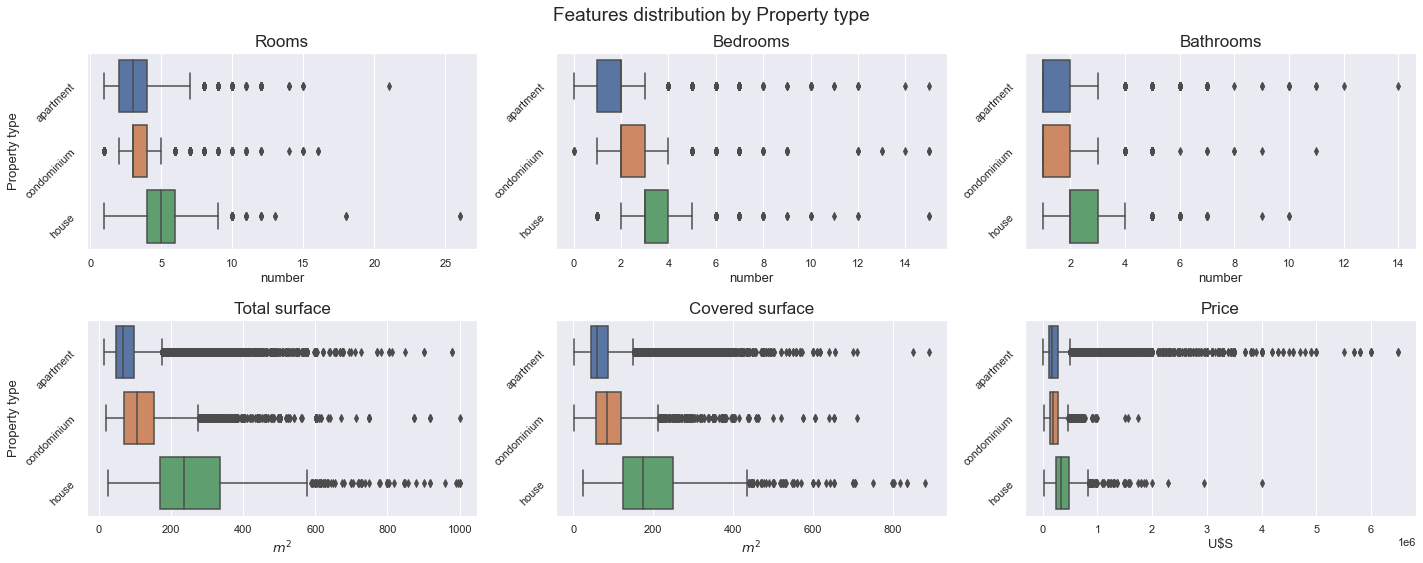

In [36]:
plt.figure(figsize=(20, 8))

plt.suptitle('Features distribution by Property type', fontsize=19)

num_plots = 6
features = ['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price', 'property_type']
xlabels = ['number', 'number', 'number', '$m^2$', '$m^2$', 'U$S']
ylabels = ['Property type','', '', 'Property type', '', '']
titles = ['Rooms', 'Bedrooms', 'Bathrooms', 'Total surface', 'Covered surface', 'Price']

for i in range(num_plots):
    plt.subplot(2,3,i+1)
    sns.boxplot(ds_7[features[i]], ds_3['property_type'])
    plt.xlabel(xlabels[i], fontsize=13)
    plt.ylabel(ylabels[i], fontsize=13)
    plt.yticks(rotation=45, horizontalalignment='right')
    plt.title(titles[i], fontsize=17)

plt.tight_layout(pad=1.3)
plt.subplots_adjust(top=0.9) 

plt.show()

**Figure 3.**  Selected Features distributions by property type. 

All the variables have outliers, specially 'Total surface', 'Covered surface' and 'Price', with very high values far from the mean.
We'll use an IQR filter by Property type.

Gruping by Property type.

In [37]:
ds_g = ds_7.groupby('property_type')

Creating a dataframe for each Property type.

In [38]:
ds_house = ds_g.get_group('house')
ds_apartment = ds_g.get_group('apartment')
ds_condominium = ds_g.get_group('condominium')

Sanity check.

In [39]:
ds_7.shape[0] == ds_house.shape[0] + ds_apartment.shape[0] + ds_condominium.shape[0]

True

Price distribution analyis for a given Property type (condominium in this case) comparing histogram and boxplot.

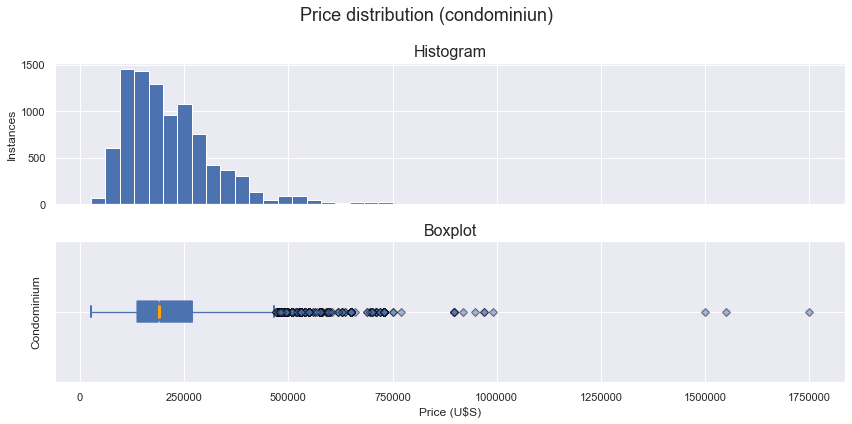

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True) 
fig.suptitle('Price distribution (condominiun)', fontsize=18) 

ax[0].hist(ds_condominium['price'], bins=50) 
ax[0].set_title('Histogram', fontsize=16) 
ax[0].set_ylabel('Instances')

bp = ax[1].boxplot(ds_condominium['price'], vert=False, patch_artist = True, notch ='True', labels=[""])
ax[1].set_title('Boxplot', fontsize=16) 
ax[1].set_xlabel('Price (U$S)')
ax[1].set_ylabel('Condominium')

plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

for patch in bp['boxes']: 
    patch.set(color='b')
    patch.set(facecolor='b')

for median in bp['medians']: 
    median.set(color ='orange', linewidth = 3)

for cap in bp['caps']: 
    cap.set(color ='b', linewidth = 2)    
    
for whisker in bp['whiskers']: 
    whisker.set(color ='b',linewidth = 1.3, linestyle ="-")
    
for flier in bp['fliers']: 
    flier.set(marker='D', markerfacecolor='b', markersize=5, alpha=0.5) 

fig.tight_layout() 
fig.subplots_adjust(top=0.85) 

plt.show() 

**Figure 4.** Combined Histogram and Boxplot visualization of Price distribution (for condominium property type). 

We can clearly see how the right-skewed distribution is affected by the outliers.


Define IQR filter function.

In [42]:
def remove_outliers(df_in):
    Q1 = df_in.quantile(0.25)
    Q3 = df_in.quantile(0.75)
    IQR = Q3-Q1
   
    df_out = df_in[~((df_in < (Q1 - 1.5 * IQR)) | (df_in > (Q3 + 1.5 * IQR))).any(axis=1) ]
    
    return df_out  

Filtering Outliers (filter_7)

In [43]:
ds_g_8 = ds_g.apply(remove_outliers) #
ds_info(ds_7, ds_g_8)

Deleted rows: 11140
Number of rows: 64482
Number of columns: 9


Filtered outliers inspection.

In [81]:
print('Instances number by property type before filtering: \n{} '.format(ds_g['property_type'].value_counts()))
print('Instances number by property type after filtering: \n{} '.format(ds_g_8['property_type'].value_counts()))

Instances number by property type before filtering: 
property_type  property_type
apartment      apartment        64433
condominium    condominium       9207
house          house             1982
Name: property_type, dtype: int64 
Instances number by property type after filtering: 
apartment      55122
condominium     7678
house           1682
Name: property_type, dtype: int64 


Filtering visualization comparing Price distributions before and after filtering (for condominium property type).

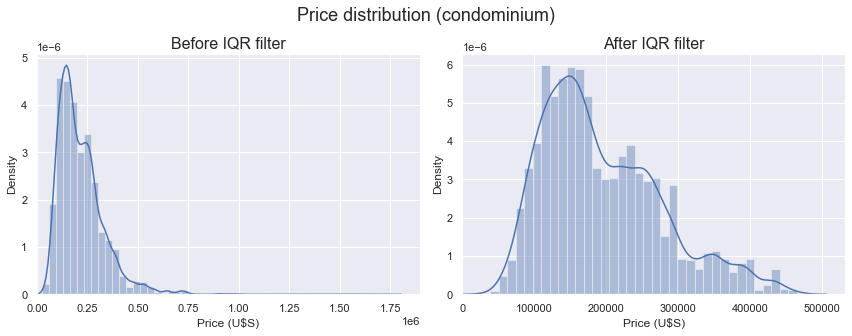

In [44]:
plt.figure(figsize=(12, 5))

plt.suptitle('Price distribution (condominium)', x=0.5, y=0.93, fontsize=18)

plt.subplot(1,2,1)
sns.distplot(ds_condominium['price'])
plt.xticks(fontweight='light')
plt.title('Before IQR filter', fontsize=16)
plt.xlabel('Price (U$S)')
plt.ylabel('Density')
plt.xlim(0,)

plt.subplot(1,2,2)
sns.distplot(ds_g_8.loc['condominium']['price'])
plt.xticks(fontweight='light') 
plt.title('After IQR filter', fontsize=16)
plt.xlabel('Price (U$S)')
plt.ylabel('Density')
plt.xlim(0,)

plt.tight_layout() 
plt.subplots_adjust(top=0.80) 

**Figura 5.** Price distribution before and after filtering (for condominium property type).

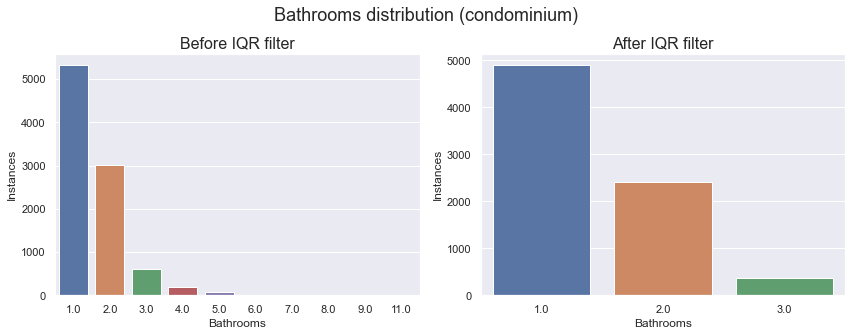

In [83]:
plt.figure(figsize=(12, 5))

plt.suptitle('Bathrooms distribution (condominium)', x=0.5, y=0.93, fontsize=18)

plt.subplot(1,2,1)
sns.countplot(ds_condominium['bathrooms'])
plt.title('Before IQR filter', fontsize=16)
plt.xlabel('Bathrooms', fontsize=12)
plt.ylabel('Instances', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(ds_g_8.loc['condominium']['bathrooms'])
plt.xticks(fontweight='light') 
plt.title('After IQR filter', fontsize=16)
plt.xlabel('Bathrooms', fontsize=12)
plt.ylabel('Instances', fontsize=12)

plt.tight_layout() 
plt.subplots_adjust(top=0.80) 

**Figura 6.** Bathrooms distribution before and after filtering (for condominium property type).

The graphs comparisons show outliers where correctly filtered.

Comparing Price distribution for a given Property type (in this case House) before and after IQR filter.

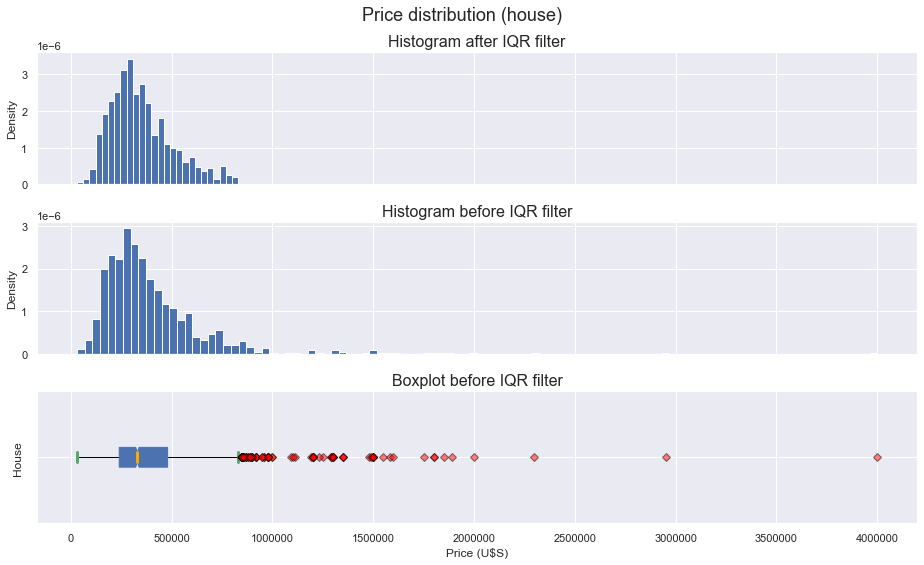

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(13, 8), sharex=True) 
fig.suptitle('Price distribution (house)', fontsize=18) 

ax[0].hist(ds_g_8.loc['house']['price'], density=True, bins='auto', label='Casa') 
ax[0].set_title('Histogram after IQR filter', fontsize=16)
ax[0].set_ylabel('Density')

ax[1].hist(ds_house['price'], density=True, bins='auto') 
ax[1].set_title('Histogram before IQR filter', fontsize=16) 
ax[1].set_ylabel('Density')
    
ax[2].set_title('Boxplot before IQR filter', fontsize=16) 
bp = ax[2].boxplot(ds_house['price'], vert=False, patch_artist = True, notch ='True', labels=['']) 
      
plt.ylabel('House')
plt.xlabel('Price (U$S)')

for patch in bp['boxes']: 
    patch.set(color='b') 

for median in bp['medians']: 
    median.set(color ='orange', linewidth = 3)

for cap in bp['caps']: 
    cap.set(color ='g', linewidth = 3)    
    
for flier in bp['fliers']: 
    flier.set(marker='D', markerfacecolor='red', alpha=0.5) 
    
fig.tight_layout() 
fig.subplots_adjust(top=0.9) 

plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0))

plt.show() 

**Figure 7** - Price distribution for 'house' property types before and after IQR filter with Boxplot.

The graph shows how the outliers (in red) were filtered and the new distribution "expands" between the Boxplot caps (in green), which correspond to the used filter limits: (Q1 - 1.5 * IQR) y (Q3 + 1.5 * IQR) respectively.

Final Prices distribution by Property type.

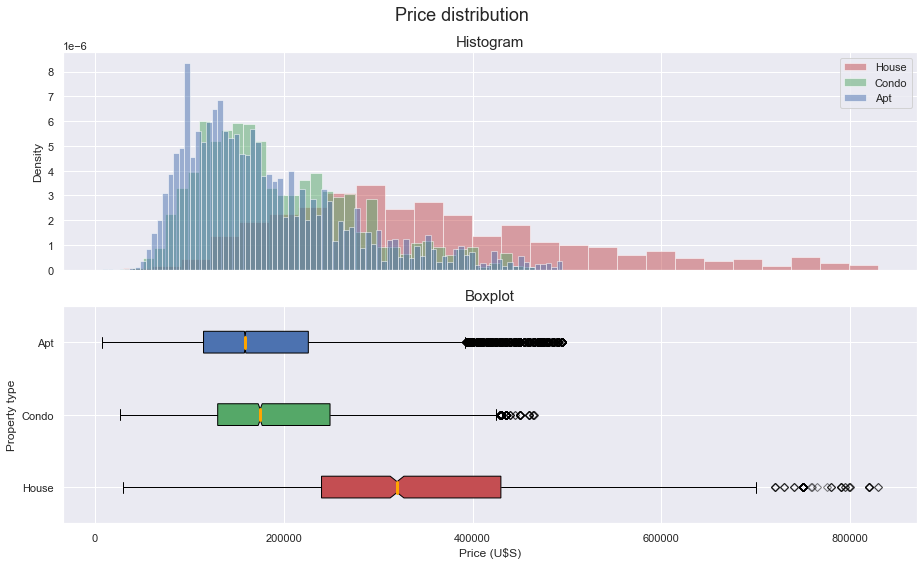

In [85]:
fig, ax = plt.subplots(2, 1, figsize=(13, 8), sharex=True) 
fig.suptitle('Price distribution', fontsize=18) 

c = ['r', 'g', 'b'] 

ax[0].hist(ds_g_8.loc['house']['price'], density=True, alpha=0.5, bins='auto', label='House', color=c[0]) 
ax[0].hist(ds_g_8.loc['condominium']['price'], density=True, alpha=0.5, bins='auto', label='Condo', color=c[1]) 
ax[0].hist(ds_g_8.loc['apartment']['price'], density=True, alpha=0.5, bins='auto', label='Apt', color=c[2]) 
ax[0].legend(loc='upper right')
ax[0].set_title('Histogram', fontsize=15) 
ax[0].set_ylabel('Density') 

bp = ax[1].boxplot((ds_g_8.loc['house']['price'], ds_g_filtered.loc['condominium']['price'], ds_g_filtered.loc['apartment']['price']), 
                    labels=["House", "Condo", 'Apt'], vert=False, patch_artist = True, notch ='True') 

ax[1].set_title('Boxplot', fontsize=15) 
ax[1].set_ylabel('Property type') 

for patch, color in zip(bp['boxes'], c): 
    patch.set_facecolor(color) 

for median in bp['medians']: 
    median.set(color ='orange', linewidth = 3)
    
for flier in bp['fliers']: 
    flier.set(marker='D', alpha=0.5) 

plt.xlabel('Price (U$S)')
    
fig.tight_layout() 
fig.subplots_adjust(top=0.9) 

plt.show() 

**Figure 8.** - Price distribution by property type represented jointly with histogram and boxplots.

Price distribution changes considerably depending on the Property type: for House type it's flatter and spans a broader range.  
The new outliers are not taken into account given that were generated after the IQR filter: the Boxplot of the new distribution is taking the new extreme values as outliers. 

Features distributions for each Property type after filtering. 

In [63]:
def plottings(dsx, name):
        
    plt.figure(figsize=(14, 8))
    plt.suptitle('Features Distributions\n Property type: {}'.format(name), fontsize=18)
    
    num_plots = 3
    features = ['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']
    xlabels = ['Number', 'Number', 'Number', '$m^2$', '$m^2$', 'U$S']
    ylabels = ['Instances','', '', 'Density', '', '']
    titles = ['Rooms', 'Bedrooms', 'Bathrooms', 'Total surface', 'Covered surface', 'Price']

    for i in range(num_plots):
        
        plt.subplot(2,3,i+1)
        sns.countplot(dsx[features[i]])
        plt.xlabel(xlabels[i])
        plt.ylabel(ylabels[i])
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.title(titles[i], fontsize=16)
        
        plt.subplot(2,3,i+4)
        sns.distplot(dsx[features[i+3]])
        plt.xlabel(xlabels[i+3])
        plt.ylabel(ylabels[i+3])
        plt.xlim(0,)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.title(titles[i+3], fontsize=16)
        plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))  
        
    plt.tight_layout(pad=1.2)
    plt.subplots_adjust(top=0.87) 


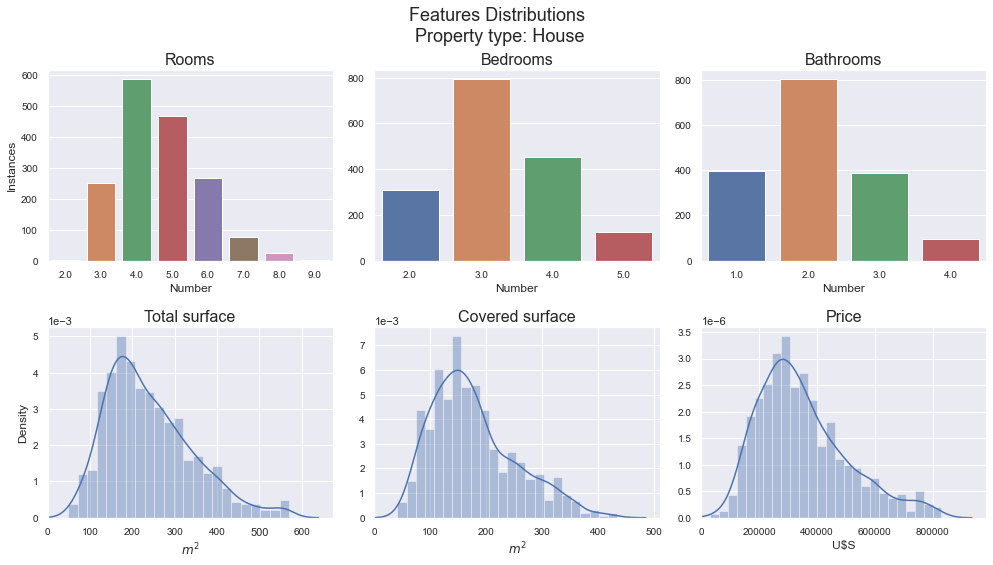

In [64]:
plottings(ds_g_8.loc['house'], 'House')

**Figure 9.** Features distributions for Property type House after IQR filter.

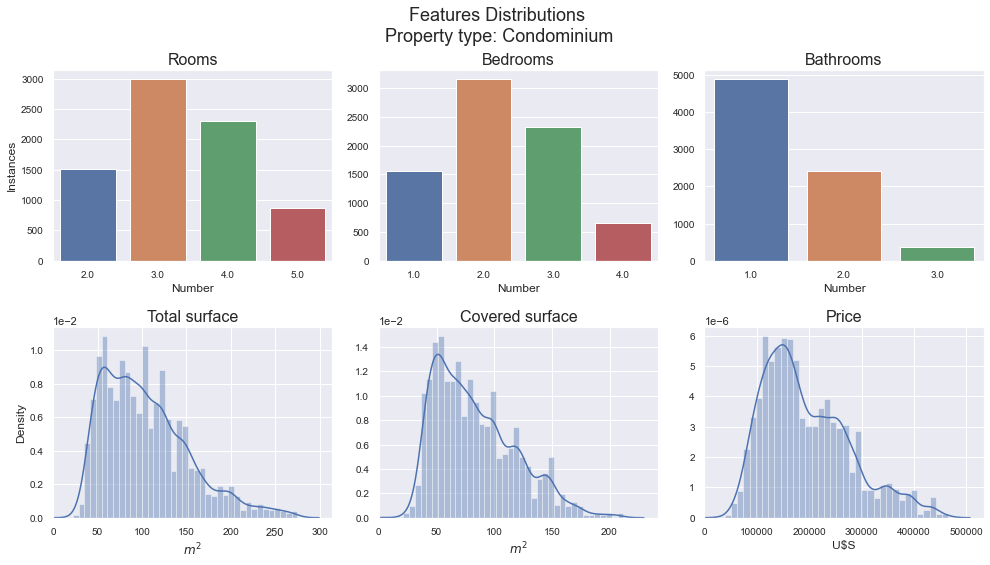

In [65]:
plottings(ds_g_8.loc['condominium'], 'Condominium')

**Figure 10.** Features distributions for Property type Condominium after IQR filter.

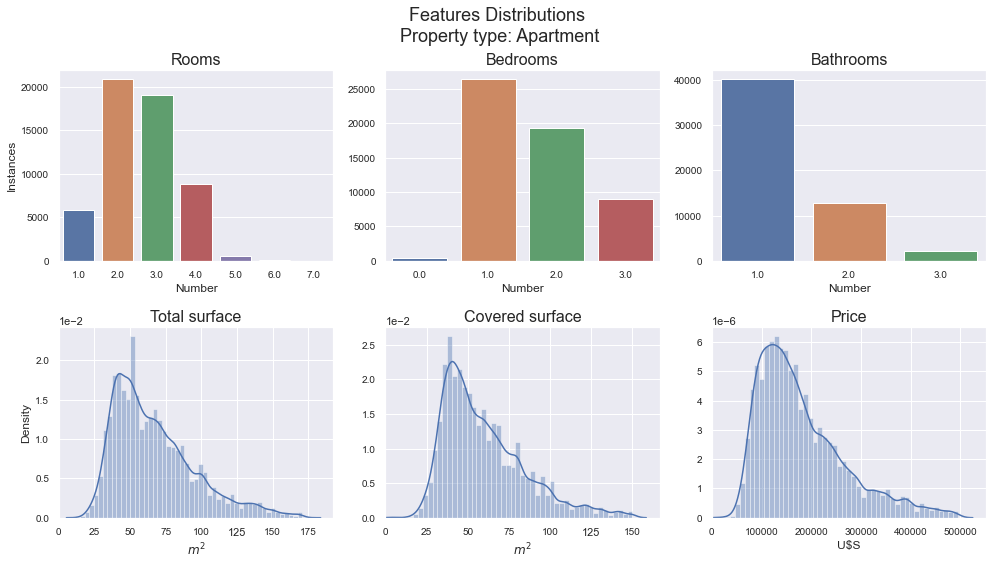

In [66]:
plottings(ds_g_8.loc['apartment'], 'Apartment')

**Figure 11.** Features distributions for Property type Apartment after IQR filter.

### 2.3 Features Correlation

Pairplot.

In [68]:
ds_g_8_sub = ds_g_8.drop(columns=['lat', 'lon'])

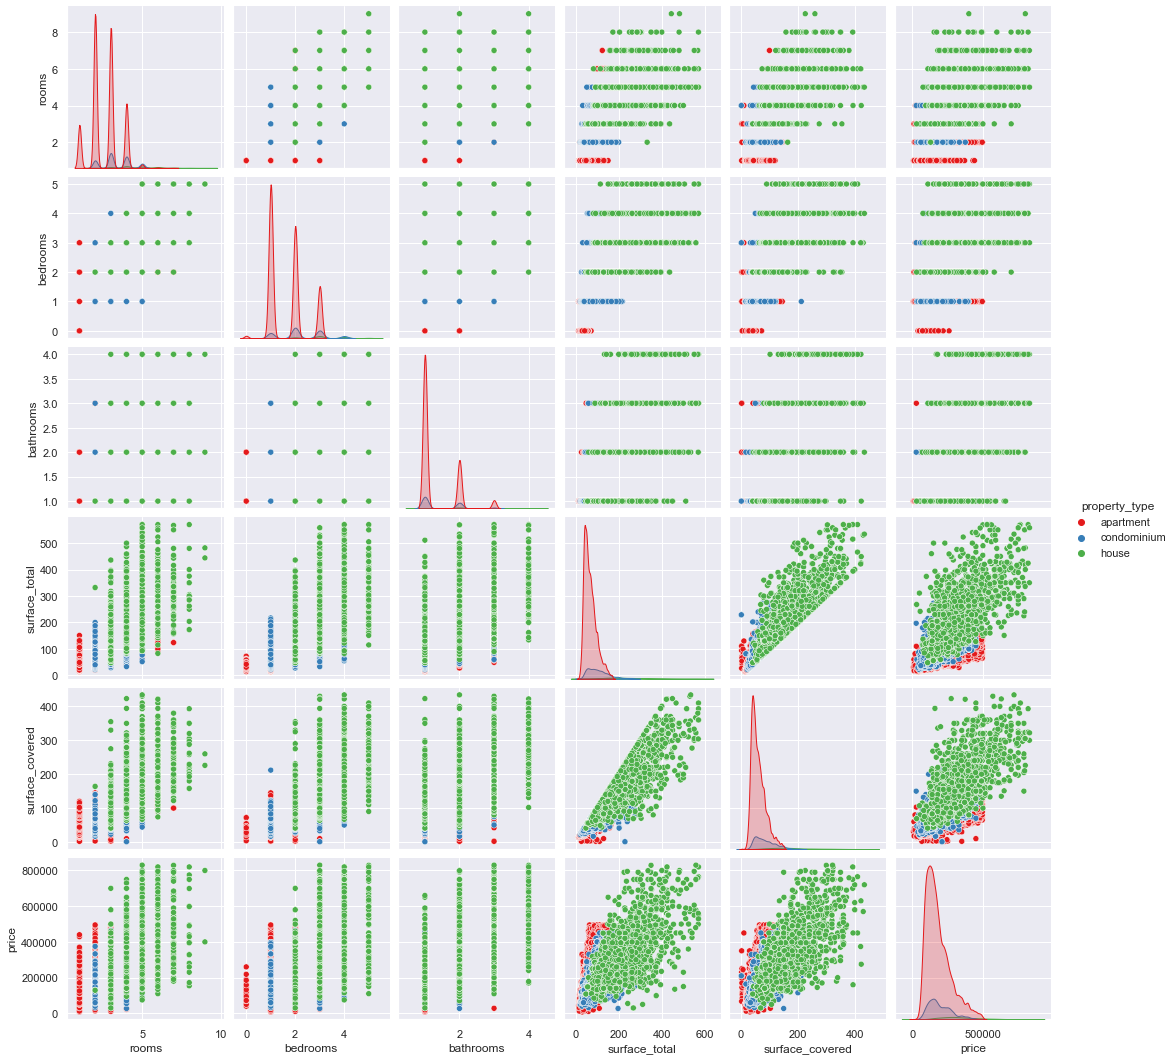

In [71]:
sns.pairplot(ds_g_8_sub, hue='property_type', palette='Set1')

**Figure 12.** Features Pairplot showing scatterplots that relate each one of them to each other and their correspondant distriburions (diagonal).

Scatterplots show a clear positive correlation of 'price' with 'surface_total' and 'surface_covered' given the points concentration in the diagonal. The grouping by colors show again how the 3 features distributions change depending on the Property type. The clear delimitation of this groups is product of the correspondant IQR filters.  

'rooms', 'bedrooms' and 'bathrooms' also show a positive correlation with 'price' and the color grouping pattern repeats: this is due to the logic relation between the surface size and number of rooms of a property.  



Features correlations by Property type.

In [98]:
ds_house_filtered_corr = ds_g_8.loc['house'].corr()
ds_condominium_filtered_corr = ds_g_8.loc['condominium'].corr()
ds_apartment_filtered_corr = ds_g_8.loc['apartment'].corr()

Correlation Heatmaps.

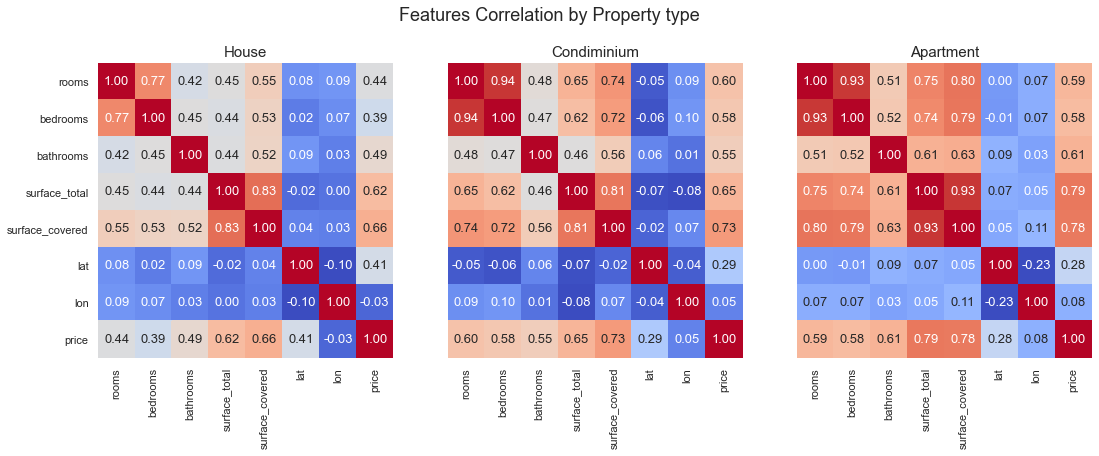

In [99]:
fig, ax = plt.subplots(1,3, figsize=(16,6), sharey=True)

fig.suptitle('Features Correlation by Property type', fontsize=18)

sns.heatmap(ds_house_filtered_corr, ax=ax[0], square=True, fmt='.2f', annot=True, annot_kws={'size': 13}, cbar=False, cmap='coolwarm')
ax[0].set_title('House', fontsize=15) 

sns.heatmap(ds_condominium_filtered_corr, ax=ax[1], square=True, fmt='.2f', annot=True, annot_kws={'size': 13}, cbar=False, cmap='coolwarm')
ax[1].set_title('Condiminium', fontsize=15) 

sns.heatmap(ds_apartment_filtered_corr, ax=ax[2], square=True, fmt='.2f', annot=True, annot_kws={'size': 13}, cbar=False, cmap='coolwarm')
ax[2].set_title('Apartment', fontsize=15) 

fig.tight_layout() 
fig.subplots_adjust(top=0.85) 

plt.show() 

**Figure 13.** Features Correlation Heatmaps by Property type.

All features show a positive correlation with Price for the 3 Property types, except longitude for House type.
Correlation between 'surface_total' and 'surface_covered is higher for Apartment type (no backyards) and also between 'rooms' and 'bedrooms' for Condominium and Apartment types (no dinning rooms, playrooms or storerooms).  
The positive correlation value of 'latitude' with the target is explained by the higher prices for properties in the north neighborhoods of 'Capital Federal' .

#### Encoding  
Transform categorical feature 'property_types' in numerical features.

In [73]:
property_type_dummies = pd.get_dummies(ds_g_8['property_type'])
ds_g_8.drop('property_type', axis=1, inplace=True)

In [74]:
ds_g_9 = pd.merge(ds_g_8, property_type_dummies, left_index=True, right_index=True)
ds_info(ds_g_8, ds_g_9)

Deleted rows: 0
Number of rows: 64482
Number of columns: 11


### 3. PCA
---

We'll reduce dataset dimensionality to visualize and analyze.

In [76]:
from sklearn.decomposition import PCA

Features 'X' and Target 'y' selection.  

In [77]:
X = ds_g_9.drop(columns='price')
y = ds_g_9['price']

Features scaling.

In [78]:
scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

Dimensionality reduction and first and second Principal Components selection.

In [79]:
pca = PCA(n_components=2)

In [80]:
pca.fit(X_scaled)

PCA(n_components=2)

In [81]:
X_pca = pca.transform(X_scaled)

2D dataset shape verification.

In [85]:
print("X_pca dataset shape: {}".format(str(X_pca.shape)))

X_pca dataset shape: (64482, 2)


Realizamos un Scatterplot de los 2 Componentes Principales y coloreamos según Precio:

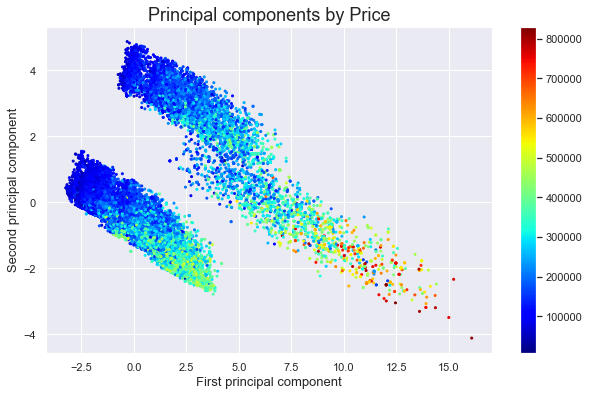

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=4, cmap="jet")
plt.colorbar()

plt.xlabel('First principal component', fontsize=13)
plt.ylabel('Second principal component', fontsize=13)

plt.title('Principal components by Price', fontsize=18)
plt.show()

**Figure 14.** Dataset scatterplot using 2 first Principal components according to Price.


We can see the first and second PCA components correlation and how the different Price levels group by sectors in this 2D space. This single plot shows the relation of all features between them and with the target Price.  
It is worth noting the warm points at the lower right representing the higher property values and their dispersion.


Components shape.

In [53]:
print('Components shape: {}'.format(pca.components_.shape))

Components shape: (2, 10)


Components dataset variance proportion.

In [55]:
pca.explained_variance_ratio_

array([0.4447936 , 0.17153579])

In [54]:
print('Components coeficients: \n{}'.format(pca.components_))

Components coeficients: 
[[ 0.41118726  0.40540538  0.30325082  0.43278414  0.43757829 -0.05957364
  -0.06848054 -0.28885646  0.18352711  0.26547078]
 [-0.15377534 -0.15739425 -0.27344832 -0.07405217 -0.1470334  -0.16218663
  -0.26344608 -0.58049616  0.64516235 -0.02801906]]


Heatmap of the components coeficients, correspondant to each feature.

<Figure size 1080x360 with 0 Axes>

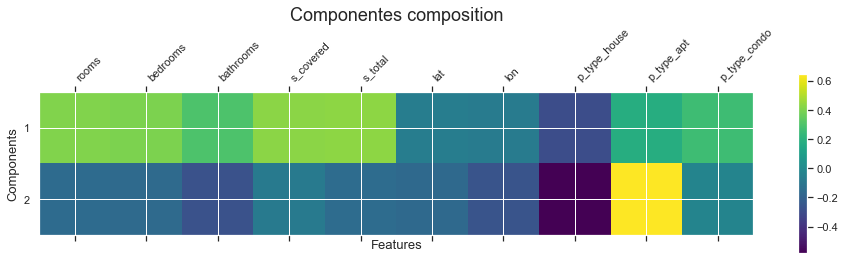

In [60]:
plt.figure(figsize=(15,5))

plt.matshow(pca.components_, cmap='viridis') 
plt.title('Componentes composition', fontsize=18)
plt.xlabel("Features", fontsize=13) 
plt.ylabel("Components", fontsize=13)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
           ['rooms', 'bedrooms', 'bathrooms', 's_covered', 's_total', 'lat', 'lon', 'p_type_house', 'p_type_apt', 'p_type_condo'],
           rotation=45, horizontalalignment='left') 
plt.yticks([0, 1], ["1", "2"])
plt.colorbar() 
plt.show()

**Figure 15.** Componentes Principal components and their coefficients, correspondant to each original dataset feature.

In the first component (which has 44,47 % of dataset variance), there is a positive correlation between features 'rooms', 'bedrooms', 'bathrooms', 'surface_covered', 'surface_total'.  
Higher coefficients in this component correspond to 'surface_covered' y 'surface_total', which are the features that higher correlation with target Price showed in the Correlation Matrix and the Pairplot.  

Dimensionality reduction allowed to visualize and analize the dataset from a different perspective. It won't be used to train the models given that the original dataset size doesn't justify it, and we would lose information and interpretation needlessly.

#### 4. Geographic information analysis
---

We use the original Dataframe before filtering to show the entire map of Buenos aires.

In [64]:
ds_geo = df.copy()

In [65]:
ds_geo = ds_geo.rename(columns={"l2": "Region"})

Realizamos un Scatterplot con los datos del Dataset original:

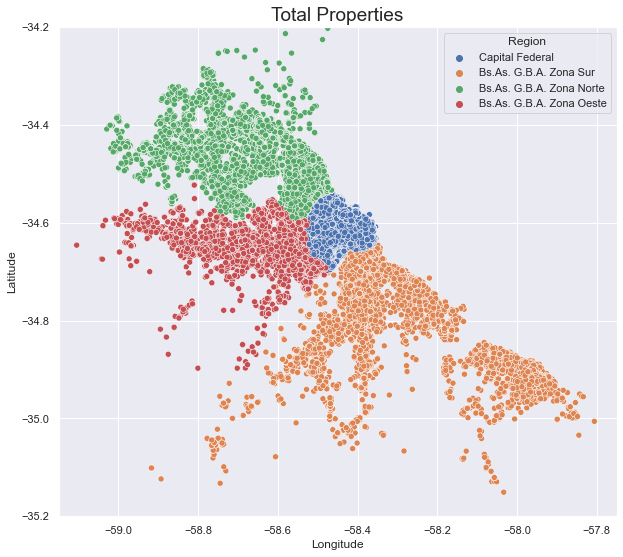

In [67]:
plt.figure(figsize=(10,9))

sns.scatterplot('lon', 'lat', data=ds_geo, hue='Region')
plt.title('Total Properties', fontsize=19)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-59.15, -57.75)
plt.ylim(-35.2,-34.2)

plt.show()

**Figure 14.** Latitude and Longitude scatterplot of all properties by region.

The graph draws the map of Capital Federal and Buenos Aires with its divisions (South, North and West)

Geographic data scatterplot of the filtered dataset with a color scale for the relation with Price.

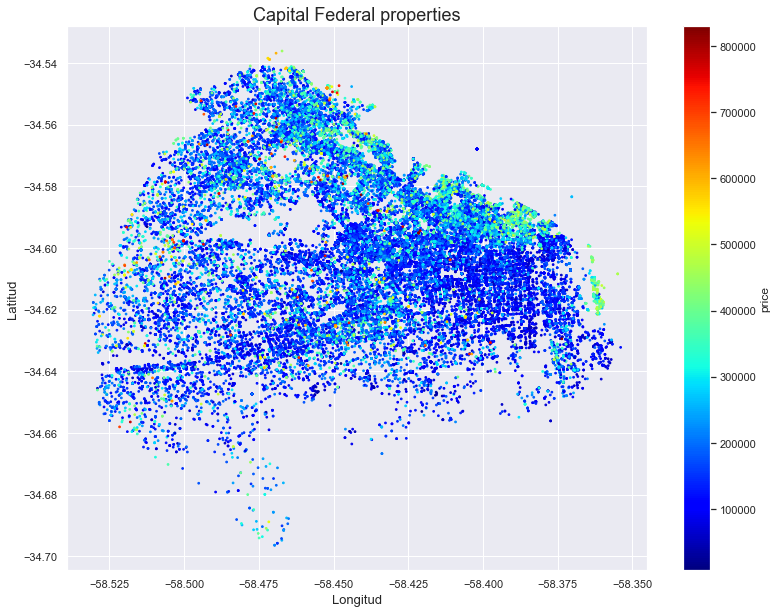

In [87]:
fig, ax = plt.subplots(figsize=(13,10))

ds_g_9.plot(kind="scatter", x="lon", y="lat", s=3, c="price", cmap="jet", ax=ax);
plt.title('Capital Federal properties', fontsize=18)
plt.xlabel('Longitud', fontsize=13)
plt.ylabel('Latitud', fontsize=13)

plt.show()

**Figure 15.** Latitude and Longitud scatterplot of Capital Federal properties by Price.

As expected, the cyan dots that represent higher values (around U$S 300000) are concentrated in the north area.

Adding a map to the graph.

In [89]:
BBox = ((ds_g_9.lon.min(),ds_g_9.lon.max(),ds_g_9.lat.min(), ds_g_9.lat.max()))

In [90]:
BBox

(-58.530468000000006, -58.3539302, -34.696419, -34.536165000000004)

Capital Federal map loading.

In [91]:
cf_mapa_test = plt.imread('datasets/map.PNG')

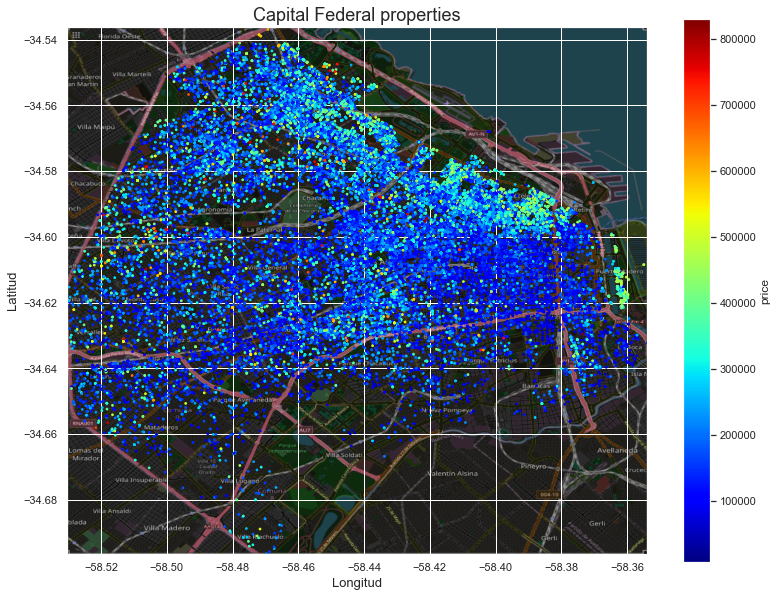

In [92]:
fig, ax = plt.subplots(figsize=(13,10))

ds_g_9.plot(kind="scatter", x="lon", y="lat", s=3, c="price", cmap="jet", ax=ax);

plt.title('Capital Federal properties', fontsize=18)
plt.xlabel('Longitud', fontsize=13)
plt.ylabel('Latitud', fontsize=13)

plt.xlim(BBox[0],BBox[1])
plt.ylim(BBox[2],BBox[3])
plt.imshow(cf_mapa_test, zorder=0, extent = BBox, aspect= 'equal')

plt.show()

**Figure 16.** Latitude and Longitud scatterplot of Capital Federal properties by Price combined with map.

More expensive properties are concentrated in the north east area (Recoleta and Puerto Madero neighborhoods) and the north west area (Belgrano and Palermo neighborhoods) 

---
<font color='grey'>dropna() Option2</font> 

In [27]:
# ds_g_filtered.dropna(inplace=True)

---

Export filtered dataset for Machine Learning.

In [38]:
ds_g_8.to_csv('E:/7 Projects (1 2)/datasets/ds_g_8.csv') # -> for group plotting in Part 3

In [110]:
ds_g_9.to_csv('E:/7 Projects (1 2)/datasets/ds_final.csv', index=False)

Sanity check.

In [111]:
ds_ml = pd.read_csv('datasets/ds_final.csv')

In [115]:
ds_ml.shape

(64482, 11)